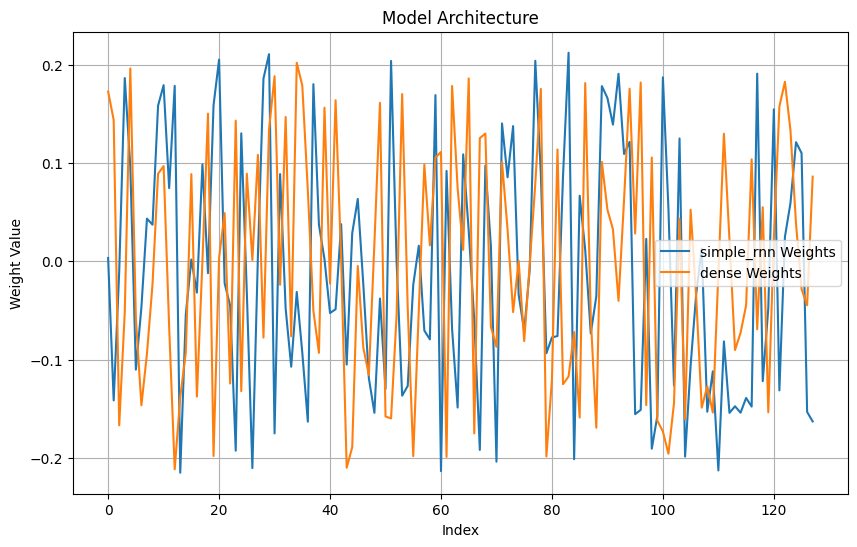

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 133.3298 - val_loss: 44.8437
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 44.8701 - val_loss: 34.8834
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 37.8428 - val_loss: 37.6993
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 40.1938 - val_loss: 40.6619
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 40.2122 - val_loss: 40.3240
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 39.6609 - val_loss: 37.3476
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 35.5871 - val_loss: 38.2205
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 36.4665 - val_loss: 29.0528
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 23.4146 - val_loss: 14.6722
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 19.7235 - val_loss: 37.7959
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 37.2749  
Test loss: 36.91374206542969
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
Actua

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data for deposition profiles
def generate_data(n_samples, n_timesteps):
    X = np.random.rand(n_samples, n_timesteps, 1)
    y = np.zeros((n_samples, n_timesteps, 1))
    for i in range(n_samples):
        for j in range(1, n_timesteps):
            y[i, j, 0] = y[i, j-1, 0] + X[i, j, 0]  # Simple accumulation
    return X, y

# Generate synthetic data
X, y = generate_data(1000, 50)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create the model
inputs = layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
rnn = layers.SimpleRNN(128, return_sequences=True)(inputs)
outputs = layers.Dense(1)(rnn)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Set the learning rate here
model.compile(optimizer=optimizer, loss='mse')

# Plot the model architecture using Matplotlib
def plot_model_architecture(model):
    plt.figure(figsize=(10, 6))
    plt.title('Model Architecture')
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.InputLayer):
            continue
        elif isinstance(layer, tf.keras.layers.Dense):
            weights = layer.get_weights()[0].flatten()  # Flatten the weights
            plt.plot(range(len(weights)), weights, label=f'{layer.name} Weights')
        elif isinstance(layer, tf.keras.layers.SimpleRNN):
            weights = layer.get_weights()[0].flatten()  # Flatten the weights
            plt.plot(range(len(weights)), weights, label=f'{layer.name} Weights')
    plt.xlabel('Index')
    plt.ylabel('Weight Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the model architecture
plot_model_architecture(model)

# Train the model
checkpoint = ModelCheckpoint('model.keras', monitor='val_loss', save_best_only=True)
history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32, callbacks=[checkpoint])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

# Predict using the model
predictions = model.predict(X_test)

# Print some of the predictions
for i in range(5):  # Print predictions for the first 5 samples
    print("Actual:", y_test[i, -1, 0], "Predicted:", predictions[i, -1, 0])
